In [6]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import PDB

def calculate_calpha_rmsd(pdb_file):
    parser = PDB.PDBParser()
    structure = parser.get_structure("structure", pdb_file)
    
    chains = structure.get_chains()
    rmsd_values = []
    
    for chain in chains:
        residues = chain.get_residues()
        ca_atoms = [residue["CA"] for residue in residues if "CA" in residue]
        
        if len(ca_atoms) > 1:
            superimposer = PDB.Superimposer()
            superimposer.set_atoms(ca_atoms[0], ca_atoms[1:])
            rmsd = superimposer.rms
            rmsd_values.append(rmsd)
    
    return rmsd_values

# PDB file paths
pdb_file_1 = "5uh5.pdb"
pdb_file_2 = "6c04.pdb"

# Calculate C-alpha RMSD for each chain in PDB 1 and PDB 2
rmsd_values_1 = calculate_calpha_rmsd(pdb_file_1)
rmsd_values_2 = calculate_calpha_rmsd(pdb_file_2)

# Plotting
x = np.arange(len(rmsd_values_1))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rmsd_values_1, width, label='PDB 1')
rects2 = ax.bar(x + width/2, rmsd_values_2, width, label='PDB 2')

ax.set_xlabel('Chain')
ax.set_ylabel('C-alpha RMSD')
ax.set_title('C-alpha RMSD Deviation for Each Chain')
ax.set_xticks(x)
ax.legend()

plt.tight_layout()
plt.show()


/home/sneha/.local/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 50725
  warnings.warn(


TypeError: object of type 'Atom' has no len()

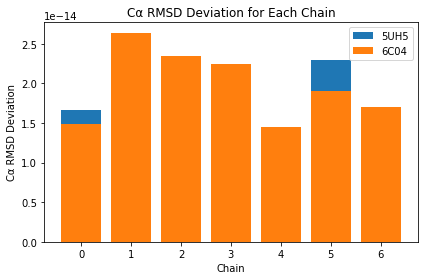

In [12]:
import matplotlib.pyplot as plt
from Bio.PDB import Superimposer, PDBParser

from Bio.PDB import Superimposer, PDBParser

def calculate_rmsd(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]

    chains = model.get_chains()
    rmsd_values = []

    for chain in chains:
        atoms = [atom for atom in chain.get_atoms() if atom.get_id() == 'CA']
        coordinates = [atom.get_coord() for atom in atoms]
        superimposer = Superimposer()
        superimposer.set_atoms(atoms, atoms)  # Pass the atoms instead of just the coordinates
        rmsd = superimposer.rms
        rmsd_values.append(rmsd)

    return rmsd_values

pdb_files = ['5uh5.pdb', '6c04.pdb']
labels = ['5UH5', '6C04']

fig, ax = plt.subplots()

for i, pdb_file in enumerate(pdb_files):
    rmsd_values = calculate_rmsd(pdb_file)
    x = range(len(rmsd_values))
    ax.bar(x, rmsd_values, label=labels[i])

ax.set_xlabel('Chain')
ax.set_ylabel('Cα RMSD Deviation')
ax.set_title('Cα RMSD Deviation for Each Chain')
ax.set_xticks(x)
ax.legend()

plt.tight_layout()
plt.show()


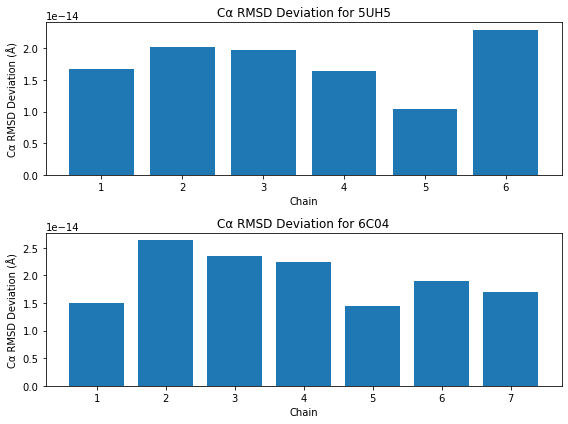

In [18]:
import matplotlib.pyplot as plt
from Bio.PDB import Superimposer, PDBParser

def calculate_rmsd(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]

    chains = model.get_chains()
    rmsd_values = []

    for chain in chains:
        atoms = [atom for atom in chain.get_atoms() if atom.get_id() == 'CA']
        coordinates = [atom.get_coord() for atom in atoms]
        superimposer = Superimposer()
        superimposer.set_atoms(atoms, atoms)  # Pass the atoms instead of just the coordinates
        rmsd = superimposer.rms
        rmsd_values.append(rmsd)

    return rmsd_values

pdb_files = ['5uh5.pdb', '6c04.pdb']
labels = ['5UH5', '6C04']

fig, axs = plt.subplots(len(pdb_files), 1, figsize=(8, 6))

for i, pdb_file in enumerate(pdb_files):
    rmsd_values = calculate_rmsd(pdb_file)
    chains = range(1, len(rmsd_values) + 1)
    axs[i].bar(chains, rmsd_values, tick_label=chains)
    axs[i].set_xlabel('Chain')
    axs[i].set_ylabel('Cα RMSD Deviation (Å)')
    axs[i].set_title('Cα RMSD Deviation for ' + labels[i])

plt.tight_layout()
plt.show()



ValueError: x and y must have same first dimension, but have shapes (224,) and (1,)

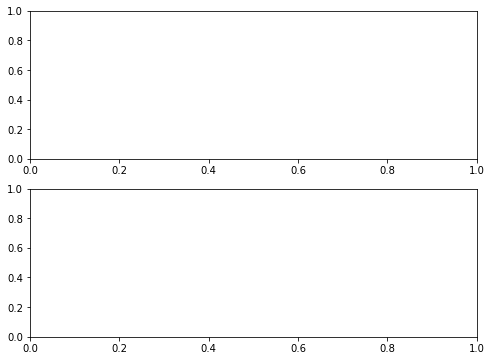

In [21]:
import matplotlib.pyplot as plt
from Bio.PDB import Superimposer, PDBParser

def calculate_rmsd(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]

    chains = model.get_chains()
    rmsd_values = {}

    for chain in chains:
        atoms = [atom for atom in chain.get_atoms() if atom.get_id() == 'CA']
        coordinates = [atom.get_coord() for atom in atoms]
        superimposer = Superimposer()
        superimposer.set_atoms(atoms, atoms)  # Pass the atoms instead of just the coordinates
        rmsd = superimposer.rms
        residue_numbers = [atom.get_parent().get_id()[1] for atom in atoms]  # Get the residue numbers
        rmsd_values[chain.get_id()] = (residue_numbers, rmsd)

    return rmsd_values

pdb_files = ['5uh5.pdb', '6c04.pdb']
labels = ['5UH5', '6C04']

fig, axs = plt.subplots(len(pdb_files), 1, figsize=(8, 6))

for i, pdb_file in enumerate(pdb_files):
    rmsd_values = calculate_rmsd(pdb_file)
    chains = rmsd_values.keys()

    for chain in chains:
        residue_numbers, rmsd = rmsd_values[chain]
        axs[i].plot(residue_numbers, rmsd * len(residue_numbers), label=f'{labels[i]} Chain {chain}')

    axs[i].set_xlabel('Residue')
    axs[i].set_ylabel('Cα RMSD Deviation (Å)')
    axs[i].set_title(f'Cα RMSD Deviation for {labels[i]}')
    axs[i].legend()

plt.tight_layout()
plt.show()
